In [1]:
import cv2
import csv
import numpy as np
import matplotlib.pyplot as plt

video = f"E66F" #Q48N
frame = f"87"
base_path = "."
csv_file = f"{base_path}/Task3_output_{video}.csv"
png_file = f'{base_path}/{video}_frame_{frame}.png'
txt_file = f'{base_path}/{video}.txt'

png_file_anotations = f'{base_path}/{video}_frame_{frame}_with_bb.png'

frame_info = {}
with open(csv_file, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        row = [int(item.split('.')[0]) for item in row]
        frame_n, track_id, class_id, bb_x, bb_y, bb_w, bb_h, *pred_adjusted_points = row
        if(f"{video}_frame{frame_n}" not in frame_info):
            frame_info[f"{video}_frame{frame_n}"] = [[frame_n, track_id, class_id, bb_x, bb_y, bb_w, bb_h, *pred_adjusted_points]]
        else:
            frame_info[f"{video}_frame{frame_n}"].append([frame_n, track_id, class_id, bb_x, bb_y, bb_w, bb_h, *pred_adjusted_points])

true_frame_info = {}
with open(txt_file) as txtfile:
    lines = [line.rstrip('\n') for line in txtfile]
    for row in lines:
        row = row.split(",")
        row = [int(item.split('.')[0]) for item in row]
        frame_n, track_id, class_id, bb_x, bb_y, bb_w, bb_h, *pred_adjusted_points = row
        # Remove visibility flag
        pred_adjusted_points = [item for item in pred_adjusted_points if item not in [0,1,2]]
        if(f"{video}_frame{frame_n}" not in true_frame_info):
            true_frame_info[f"{video}_frame{frame_n}"] = [[frame_n, track_id, class_id, bb_x, bb_y, bb_w, bb_h, *pred_adjusted_points]]
        else:
            true_frame_info[f"{video}_frame{frame_n}"].append([frame_n, track_id, class_id, bb_x, bb_y, bb_w, bb_h, *pred_adjusted_points])

CLASS_COLORS = {
    0: (255, 0, 0),
    1: (255, 255, 0),
    2: (255, 0, 255),
    3: (0, 255, 255),
    4: (0, 255, 0),
    5: (0, 0, 255)
}

In [2]:
def draw_bb(img, class_id, bb_x, bb_y, bb_w, bb_h):
    #cv2.rectangle(image, start_point, end_point, color, thickness)
    return cv2.rectangle(img, (bb_x, bb_y), (bb_x + bb_w, bb_y + bb_h), CLASS_COLORS[class_id], 2) 

def draw_kp(img, class_id, kp_x, kp_y): 
    cv2.circle(img, (kp_x, kp_y), 5, CLASS_COLORS[class_id], thickness = 5, lineType = 8, shift = 0)     
    return img    
    
def test_img(data):
    # id of the object ->  0	Left Hand  |  1 Right Hand  |  2 Scissors  | 3 Tweezers  |  4 Needle Holder  |  5 Needle
    img = cv2.imread(png_file)
    for info in data[f"{video}_frame{frame}"]:
        frame_n, track_id, class_id, bb_x, bb_y, bb_w, bb_h, *pred_adjusted_points = info
        img = draw_bb(img, class_id, bb_x, bb_y, bb_w , bb_h )
        for kp in range(0,len(pred_adjusted_points),2):
            draw_kp(img, class_id, pred_adjusted_points[kp],pred_adjusted_points[kp+1])
    plt.title(f"{video}_frame_{frame}")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return img
    

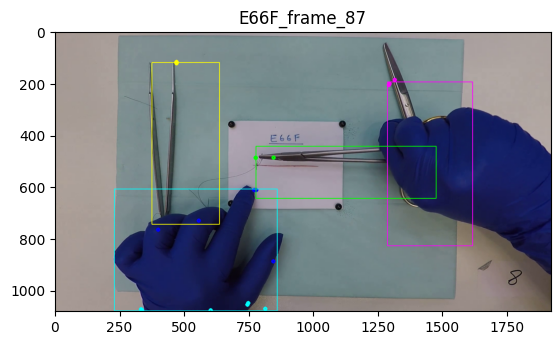

In [3]:
img = test_img(frame_info)

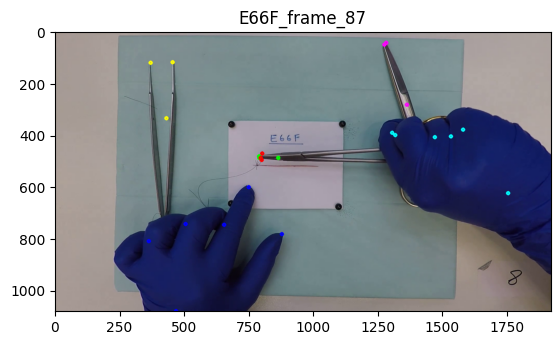

In [4]:
true_img = test_img(true_frame_info)

In [10]:
cv2.imwrite(png_file_anotations, img)

True